Mean sizes 88.1209051724138
0.4605
Mean sizes 2.0683333333333334
3.4537500000000003


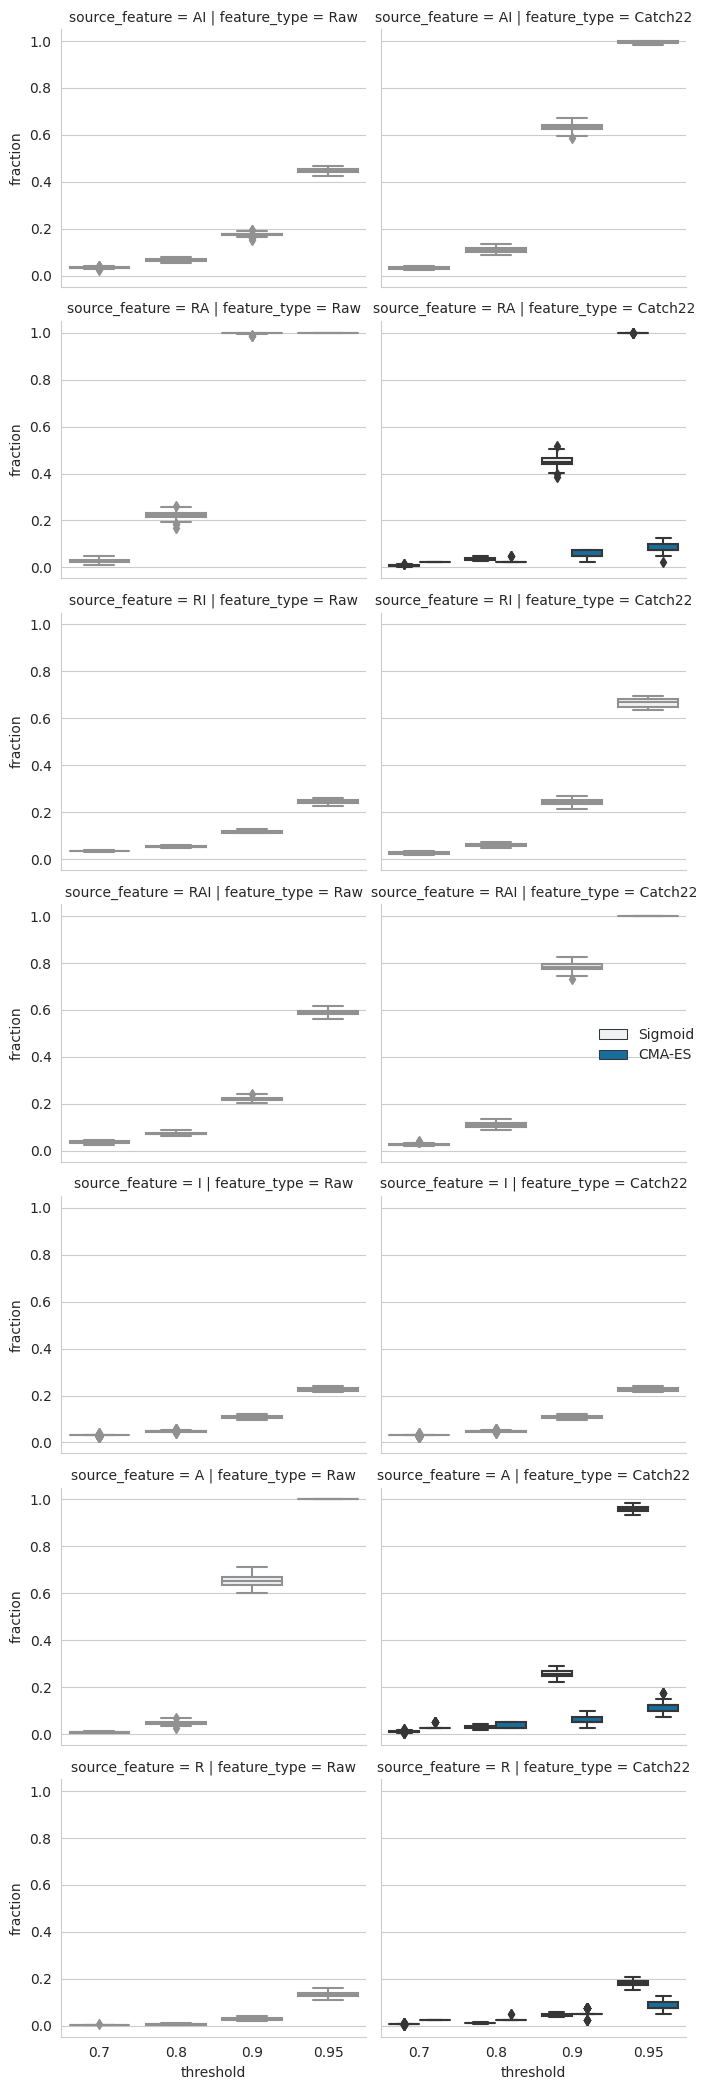

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("colorblind")


# Path to selected instance sets

def get_sizes(path, benchmark, n_instances: int) -> pd.DataFrame:
    fnames = list(path.glob("**/*.csv"))
    threshs = [float(f.parts[-3]) for f in fnames]
    sizes = [len(f.read_text().split("\n")) - 1 for f in fnames]
    feature_types = [f.parts[-5] for f in fnames]
    source_features = [f.parts[-4] for f in fnames]

    print("Mean sizes", np.mean(sizes))
    print(138.15/n_instances)
    df = pd.DataFrame({
        "threshold": threshs,
        "size": sizes,
        "fraction": np.array(sizes) / n_instances,
        "benchmark": benchmark,
        "feature_type": feature_types,
        "source_feature": source_features,
    })
    return df

benchmarks = ["Sigmoid", "CMA-ES"]
n_insts = [300, 40]
paths = [
    Path("../data/instance_sets/selected/generated/Sigmoid/2D3M_train/Train"),
    Path("../data/instance_sets/selected/generated/CMA-ES/seplow_train/Train")
]

D = []
for benchmark, n_instances, path in zip(benchmarks, n_insts, paths):
    if path.is_dir():
        D.append(
            get_sizes(path, benchmark, n_instances)
        )
df = pd.concat(D).reset_index(drop=True)


grid = sns.FacetGrid(data=df, col="feature_type", row="source_feature")
grid.map_dataframe(sns.boxplot, x="threshold", y="fraction", hue="benchmark")
grid.add_legend()
grid.fig.set_tight_layout(True)
plt.show()

ax = sns.histplot(data=df, x="size", kde=True, hue="benchmark")
data = ax.lines[0].get_xydata()
print(data[np.where(data[:, 1] == max(data[:, 1]))])
plt.show()